### DSC630 Assignment 3.2
#### Madison Christiansen 

##### In this assignment, you will be using data on the Los Angeles Dodgers Major League Baseball (MLB) team. Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make.


In [28]:
import pandas as pd
from scipy.stats import f_oneway, pearsonr
import matplotlib.pyplot as plt
import researchpy as rp
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv('/Users/madisonchristiansen/Desktop/dodgers-2022.csv')   
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [15]:
## Looking at the average attendance acoss the features - 
## gives an understanding as to when they have the most attendance

# Month - largest to smallest
average_attendance_by_month = df.groupby('month')['attend'].mean()
print('Attendance by Month:', average_attendance_by_month.sort_values(ascending=False))

Attendance by Month: month
JUN    47940.444444
JUL    43884.250000
AUG    42751.533333
APR    39591.916667
SEP    38955.083333
MAY    37345.722222
OCT    36703.666667
Name: attend, dtype: float64


In [16]:
# Day of Week - largest to smallest
average_attendance_by_day = df.groupby('day_of_week')['attend'].mean()
print('Attendance by Day of Week:', average_attendance_by_day.sort_values(ascending=False))


Attendance by Day of Week: day_of_week
Tuesday      47741.230769
Saturday     43072.923077
Sunday       42268.846154
Thursday     40407.400000
Friday       40116.923077
Wednesday    37585.166667
Monday       34965.666667
Name: attend, dtype: float64


In [17]:
# Skies - largest to smallest
average_attendance_by_skies = df.groupby('skies')['attend'].mean()
print('Attendance by Skies:', average_attendance_by_skies.sort_values(ascending=False))

Attendance by Skies: skies
Clear     41729.209677
Cloudy    38791.315789
Name: attend, dtype: float64


In [18]:
# Day or Night - largest to smallest
average_attendance_by_day_night = df.groupby('day_night')['attend'].mean()
print('Attendance by Day or Night:', average_attendance_by_day_night.sort_values(ascending=False))

Attendance by Day or Night: day_night
Day      41793.266667
Night    40868.893939
Name: attend, dtype: float64


In [19]:
# Temp - largest to smallest 
average_attendance_by_temp = df.groupby('temp')['attend'].mean()
print('Attendance by Temp:', average_attendance_by_temp.sort_values(ascending=False))

Attendance by Temp: temp
74    51131.333333
66    50043.000000
72    49763.000000
75    48597.571429
68    47884.500000
80    45957.400000
63    44014.000000
76    43873.000000
71    42680.000000
83    42484.000000
78    42418.000000
77    41807.000000
70    41334.333333
73    40330.250000
85    40167.000000
67    39938.857143
95    39028.000000
81    38949.500000
57    37438.500000
84    37116.000000
61    36561.000000
59    36283.000000
65    35895.000000
86    34689.000000
79    34627.500000
82    34014.000000
64    33625.500000
89    31607.000000
54    31601.000000
58    29729.000000
60    26376.000000
69    25509.000000
Name: attend, dtype: float64


In [20]:
# Opponent - largest to smallest
average_attendance_by_opponent = df.groupby('opponent')['attend'].mean()
print('Attendance by Opponent:', average_attendance_by_opponent.sort_values(ascending=False))

Attendance by Opponent: opponent
Angels       49777.333333
Mets         49586.250000
Nationals    49267.333333
White Sox    46382.000000
Cubs         44206.666667
Padres       42092.222222
Phillies     41897.000000
Cardinals    40853.285714
Marlins      40665.333333
Reds         40649.000000
Rockies      39631.222222
Snakes       39315.444444
Giants       39296.333333
Pirates      38019.000000
Astros       35383.333333
Brewers      35358.750000
Braves       32245.000000
Name: attend, dtype: float64


### Looking at p-values to determine if the attendance is statistically significant across the features tested. A p-value lower then 0.05 indicats we reject the null hypothesis, which is that there is no significant difference in the average attendance across the tested feature. 

### Looking at the Pearson's correlation to look at what has a strong and weak correlation to attendance. 

In [6]:
## Creating an ANOVA test of the features - 
## Gives an understnading as to if the differences in attendace as statistically significant 

# Month 
groups = []
for day in df['month'].unique():
    groups.append(df[df['month'] == day]['attend'])

f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

F-Statistic: 2.567203673835352
P-Value: 0.02584676447086318


In [60]:
# Day of Week
groups = []
for day in df['day_of_week'].unique():
    groups.append(df[df['day_of_week'] == day]['attend'])

f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

F-Statistic: 3.644032326193235
P-Value: 0.003185034232658946


In [27]:
# Skies
groups = []
for day in df['skies'].unique():
    groups.append(df[df['skies'] == day]['attend'])

f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

F-Statistic: 1.8423961635393247
P-Value: 0.1785354913958893


In [29]:
# Day or Night
groups = []
for day in df['day_night'].unique():
    groups.append(df[df['day_night'] == day]['attend'])

f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

F-Statistic: 0.15007457126273074
P-Value: 0.6995058414022322


In [61]:
# Temp
corr, p_value = pearsonr(df['attend'], df['temp'])

print(f"Pearson's Correlation Coefficient:", corr)
print(f"P-Value:", p_value)

Pearson's Correlation Coefficient: 0.09895073090623711
P-Value: 0.37946938868825275


In [31]:
# Opponent
groups = []
for day in df['opponent'].unique():
    groups.append(df[df['opponent'] == day]['attend'])

f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

F-Statistic: 1.3759848896865952
P-Value: 0.18253553289949573


### Accept Null Hypothesis: Opponent, Temp, Day or Night, Skies - These do not have a statistical significance when it comes to attendance across the different circumstances.
### Reject Null Hypothesis:  Month, Day of Week - These have a statistical significance.

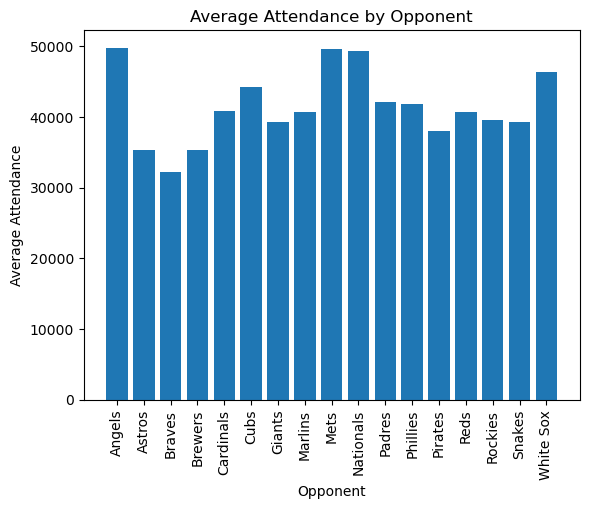

In [37]:
## Looking futher at accepted null hypothesis feautres 

# Opponent
plt.bar(average_attendance_by_opponent.index, average_attendance_by_opponent)
plt.xlabel('Opponent')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Opponent')
plt.xticks(rotation=90)

plt.show()

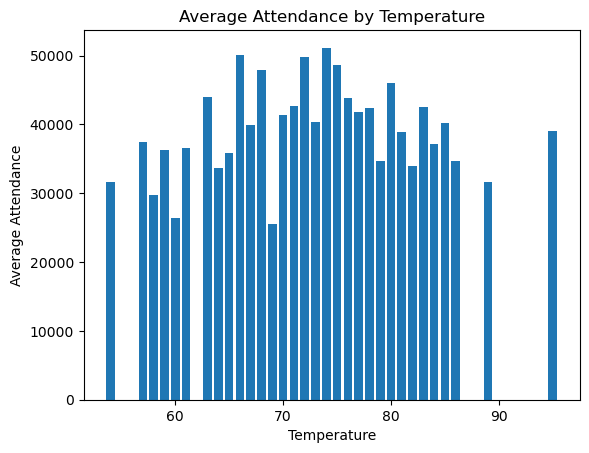

In [40]:
# Temp
plt.bar(average_attendance_by_temp.index, average_attendance_by_temp)
plt.xlabel('Temperature')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Temperature')
plt.show()

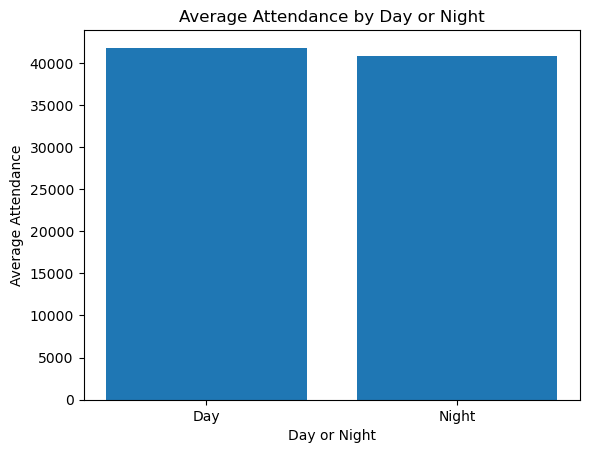

In [41]:
# Day or Night
plt.bar(average_attendance_by_day_night.index, average_attendance_by_day_night)
plt.xlabel('Day or Night')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Day or Night')
plt.show()

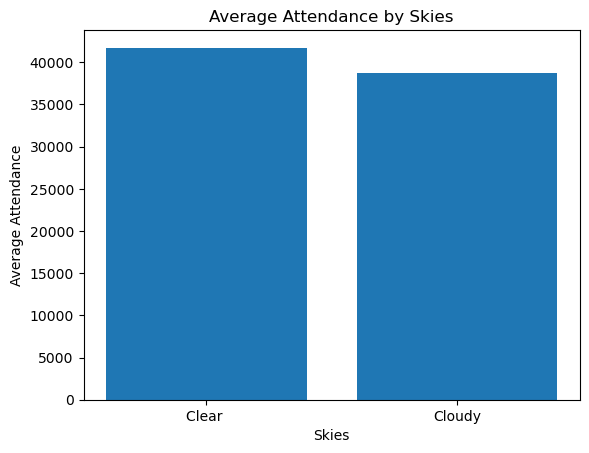

In [42]:
# Skies
plt.bar(average_attendance_by_skies.index, average_attendance_by_skies)
plt.xlabel('Skies')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Skies')
plt.show()

In [26]:
selected_columns = ['attend','cap','shirt','fireworks','bobblehead']

fet_df = pd.DataFrame(df, columns=selected_columns)

feature_df = pd.get_dummies(fet_df, columns=['cap', 'shirt', 'fireworks', 'bobblehead'])

feature_df.head()

,attend,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
0,56000,1,0,1,0,1,0,1,0
1,29729,1,0,1,0,1,0,1,0
2,28328,1,0,1,0,1,0,1,0
3,31601,1,0,1,0,0,1,1,0
4,46549,1,0,1,0,1,0,1,0


In [27]:
## Looking at feature importance 

# Assuming you have already loaded the dataset into a DataFrame called 'df'
# Separate the features and target variable
X = feature_df.drop('attend', axis=1)
y = feature_df['attend']

# Create a Random Forest regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(feature_importance_df)

          Feature  Importance
7  bobblehead_YES    0.490607
6   bobblehead_NO    0.350511
3       shirt_YES    0.048831
2        shirt_NO    0.045111
5   fireworks_YES    0.032622
4    fireworks_NO    0.025364
1         cap_YES    0.003612
0          cap_NO    0.003341


### When tyring to increase attendance to the MLB games first you need to be able to show what features are impacting or assoicated with the attendacne. You can see that the months and days of the week are statisically significant when looking at the amount of people attending these games. For the variables that are not statisically significant you can see that temperature and opponent are variables that might have an impact. Although based on the low p-value and when looking at the feature in a graph the skies and day or night features don't seem to have much impact on attendance. Looking futher at the other features you can see that bobbleheads have the highest importance and caps is the lowest. 
### These tests preformed can give the MLB an idea as to what is impacting their attendance and shows the attendace they should be expecting based on the different features they collect data on. When it comes to recomendations of improving the attendance, I think marketing targeted towards the months and days that have lower attendance. Along with this marketing that is targeted towards the bobbleheads and shirts. These two feature seems to have a higher importance and if they are marketed better it could pull more people to the games. 